In [202]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [203]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [204]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [205]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [206]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [207]:
# View all of the classes that automap found


In [208]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [209]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [210]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(latest_date)

2017-08-23


2016-08-23


Text(0, 0.5, 'Inches')

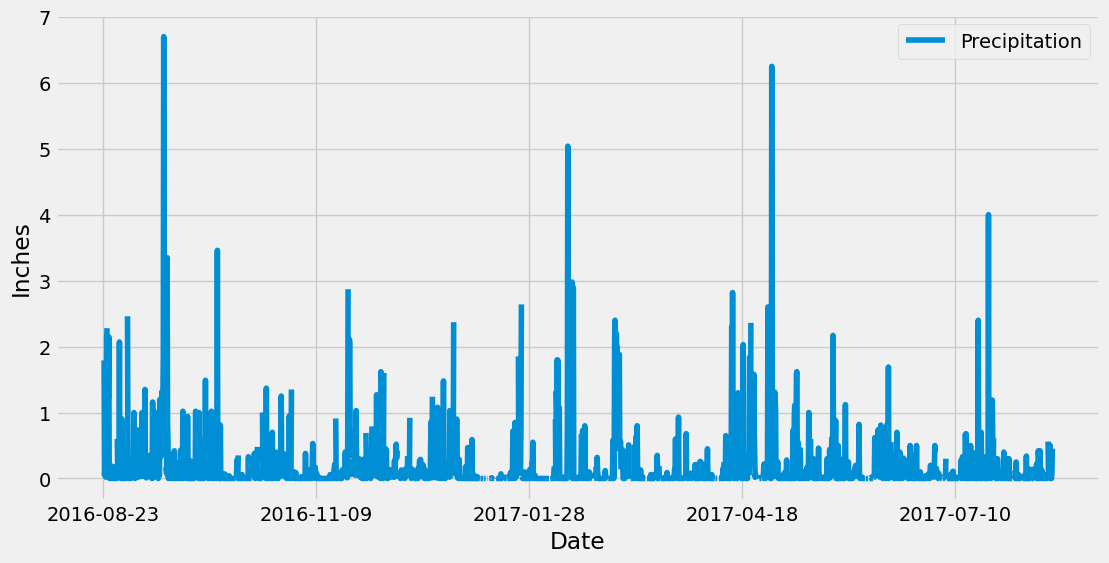

In [211]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8,23) - dt.timedelta(days = 365)
print(query_date)

# Perform a query to retrieve the data and precipitation scores
recent_12_months = session.query(Measurement.station,Measurement.date,Measurement.prcp).filter(Measurement.date >= query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(recent_12_months).set_index('date')

# Sort the dataframe by date
df = df.sort_index()
df.head()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(y='prcp', figsize=(12,6))
plt.legend(['Precipitation'])
plt.xlabel('Date')
plt.ylabel('Inches')

In [212]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [213]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Measurement.station).group_by(Measurement.station).count()
print(station_count)

9


In [214]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station))\
.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(f'The station with the most activity is {station_activity[0][0]} with {station_activity[0][1]} records.')


The station with the most activity is USC00519281 with 2772 records.


In [215]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = station_activity[0][0]
low = session.query(func.min(Measurement.tobs)).filter(Measurement.station == active_station).filter(Measurement.date >= query_date).all()
high = session.query(func.max(Measurement.tobs)).filter(Measurement.station == active_station).filter(Measurement.date >= query_date).all()
avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == active_station).filter(Measurement.date >= query_date).all()
print(f'Station {active_station} recorded a low temperature of {low[0][0]}, a high temperature \
of {high[0][0]}, with and average temperature of {round(avg[0][0],2)}.')


Station USC00519281 recorded a low temperature of 59.0, a high temperature of 83.0, with and average temperature of 73.11.


In [216]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_count = session.query(Measurement.tobs, func.count(Measurement.tobs)).filter(Measurement.station == active_station).\
    filter(Measurement.date >= query_date).group_by(Measurement.tobs)\
    .all()
print(tobs_count)

[(59.0, 3), (60.0, 2), (61.0, 1), (62.0, 6), (63.0, 4), (64.0, 3), (65.0, 7), (66.0, 5), (67.0, 15), (68.0, 12), (69.0, 19), (70.0, 22), (71.0, 18), (72.0, 22), (73.0, 18), (74.0, 39), (75.0, 33), (76.0, 33), (77.0, 31), (78.0, 22), (79.0, 18), (80.0, 11), (81.0, 4), (82.0, 3), (83.0, 1)]


In [217]:
tobs_df = pd.DataFrame(tobs_count, columns=['Temperature','Frequency'])
tobs_df.head()

,Temperature,Frequency
0,59.0,3
1,60.0,2
2,61.0,1
3,62.0,6
4,63.0,4


In [218]:
# tobs_low = tobs_count[0][0]
# tobs_high = tobs_count[-1][0]
# bins = [tobs_low]
# for i in range(1,13):
#     tobs = ((tobs_high - tobs_low)/12)*i + tobs_low
#     bins.append(tobs)
# print(bins)

In [219]:

# tobs_df['bin'] = pd.cut(tobs_df['Temperature'],bins=bins,include_lowest=True)
# tobs_groups = tobs_df.groupby([bin])
# tobs_groups

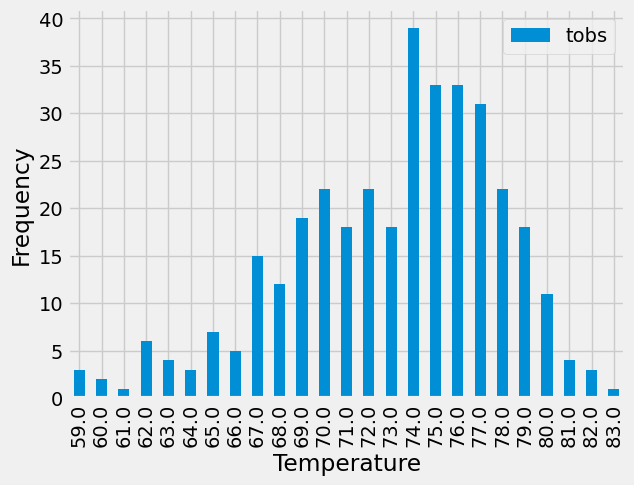

In [222]:

tobs_df.plot(kind='bar', x='Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])

# Close session

In [223]:
# Close Session
session.close()